<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

# Create The Signal

In [3]:
a1 = 22
a2 = 14
a3 = 147

NT = 3*10**4
tf = 15
t0 = -15
dt=(tf-t0)/NT

t = np.linspace(t0, tf, NT)
x = np.cos(a1*np.pi*t) + 0.7*np.sin(a2*np.pi*t) + 0.5*np.sin(a3*np.pi*t)

# Part A

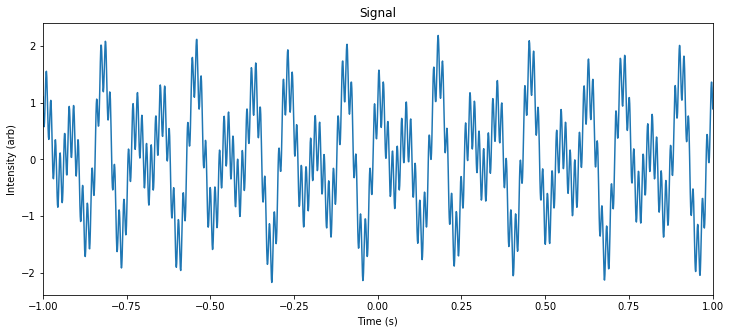

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(t, x)

ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (arb)')
ax.set_xlim(-1, 1)

plt.show()

# Part B

Find the power spectral density:

In [5]:
fq, Gxx = sp.signal.periodogram(x, 1/dt)

Check that Parseval's Theorem holds (consistency check):

$$\int_{-\infty}^{\infty} |x(t)|^2 dt =T\int_{-\infty}^{\infty} S_{xx}(f) df $$

In [6]:
LHS = (tf-t0)*np.trapz(Gxx, fq)
RHS = np.trapz(x**2, dx=dt)

print('The left hand side is {}'.format(LHS))
print('The right hand side is {}'.format(RHS))

The left hand side is 26.10012996649244
The right hand side is 26.09913


Plot the power spectral density:

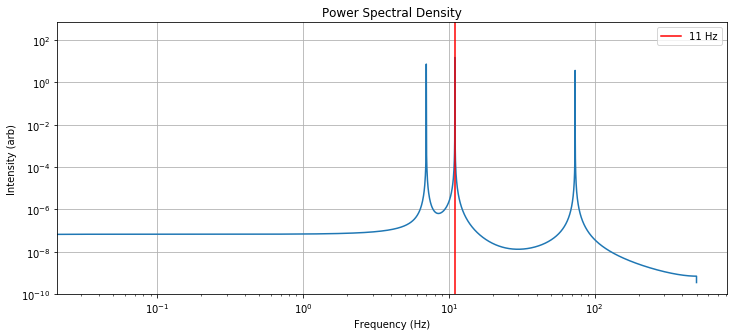

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.loglog(fq, Gxx)
ax.set_ylim(ymin=10**-10)

ax.set_title('Power Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Intensity (arb)')

ax.axvline(11, color='r', label='11 Hz')
ax.legend()
ax.grid()

plt.show()

# Part C

Design the filter. In our functions below, fs is the cutoff frequency, lowcut and highcut is the band of the filter and order is the order of the butterworth filter.

In [8]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = sp.signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

Define the cutoff frequency and the lowcut and highcut for the butterworth filter (the places where the intesity goes to $1/\sqrt{2}$).

In [9]:
fs = fq[-1]
lowcut = 7
highcut = 15

Plot a few butterworth filters of varying order. The black dotted line is placed on the frequency we wish to extract.

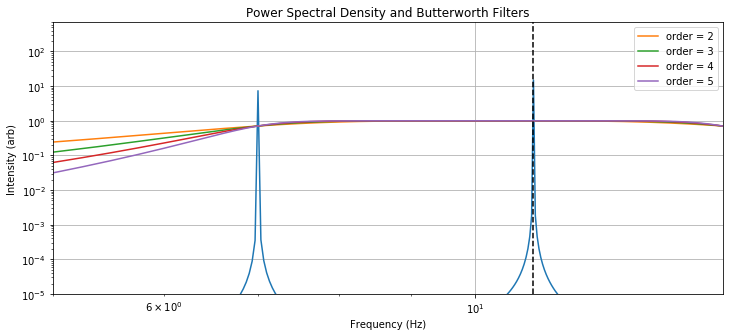

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.loglog(fq, Gxx)

ax.set_title('Power Spectral Density and Butterworth Filters')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Intensity (arb)')

for order in [2, 3, 4, 5]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sp.signal.freqz(b, a, worN=2000)
    ax.loglog((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

ax.axvline(11, color='k', linestyle='dashed')

ax.set_ylim(ymin = 10**-5)
ax.set_xlim(5, 15)

ax.legend()
ax.grid()

plt.show()

While higher orders appear to remove most of the lower frequency (7Hz), they also require the most amplification. Below we play around with a few low cuts, high cuts, and varying order to attempt to create the best signal. The "goodness" of the signal will be determined y requiring minimal amplifcation and containing the frequency desired. 

In [11]:
lowcut_1 = 8
highcut_1 = 14
lowcut_2 = 7
highcut_2 = 15

y1 = butter_bandpass_filter(x, lowcut_1, highcut_1, fs, order=2)
y2 = butter_bandpass_filter(x, lowcut_1, highcut_1, fs, order=3)
y3 = butter_bandpass_filter(x, lowcut_2, highcut_2, fs, order=3)
y4 = butter_bandpass_filter(x, lowcut_2, highcut_2, fs, order=4)
y_theo = np.cos(a1*np.pi*t)

In the plots below, the black dotted line represents the desired signal.

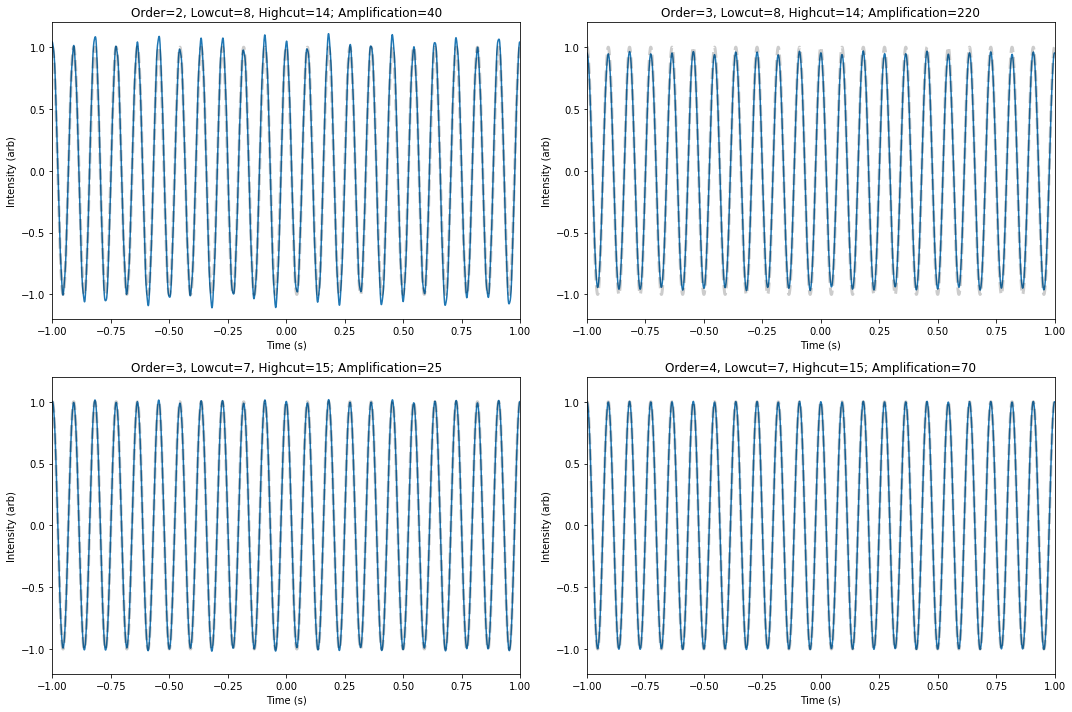

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0][0].plot(t, 40*y1)
ax[0][1].plot(t, 220*y2)
ax[1][0].plot(t, 25*y3)
ax[1][1].plot(t, 70*y4)

for ax_row in ax:
    for ax_plot in ax_row:
        ax_plot.plot(t, y_theo, color='k', linestyle='dashed', alpha=0.2, linewidth=3)
        ax_plot.set_xlabel('Time (s)')
        ax_plot.set_ylabel('Intensity (arb)')
        ax_plot.set_xlim(-1,1)
        ax_plot.set_ylim(-1.2,1.2)
        
ax[0][0].set_title('Order=2, Lowcut=8, Highcut=14; Amplification=40')
ax[0][1].set_title('Order=3, Lowcut=8, Highcut=14; Amplification=220')
ax[1][0].set_title('Order=3, Lowcut=7, Highcut=15; Amplification=25')
ax[1][1].set_title('Order=4, Lowcut=7, Highcut=15; Amplification=70')


fig.tight_layout()
plt.show()

We choose the bottom left plot (corresponding to $25y_3$) as our filtered time series. Its power spectrum is:

In [13]:
fq_filt, Gxx_filt = sp.signal.periodogram(25*y3, 1/dt)

## Part D

Here is the filtered signals power spectral density plotted against the original signals power spectral density:

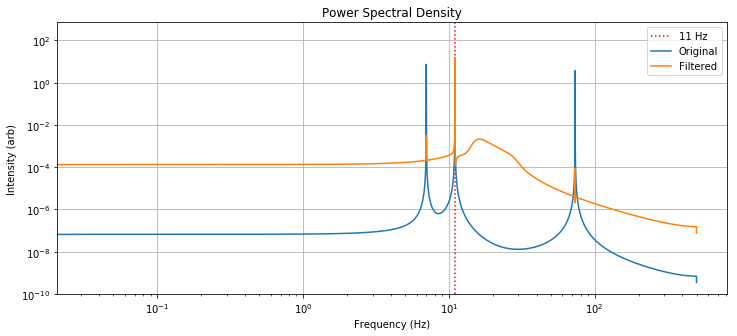

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.axvline(11, color='r', label='11 Hz', linestyle='dotted')
ax.loglog(fq, Gxx, label='Original')
ax.loglog(fq_filt, Gxx_filt, label='Filtered')
ax.set_ylim(ymin=10**-10)

ax.set_title('Power Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Intensity (arb)')

ax.legend()
ax.grid()

plt.show()

## Part E

**(Not-Required)** First we plot the signal between $-1$s and $1$s with the filtered frequency removed:

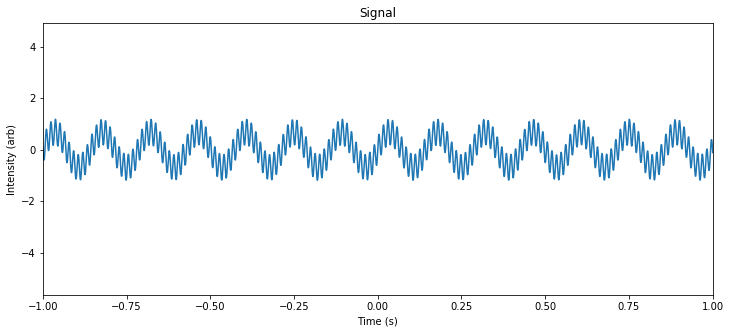

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(t, x-25*y3)

ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (arb)')
ax.set_xlim(-1, 1)

plt.show()

Plotting $x_f-x_1$ between -15s and 15s allows us to see that divergence occurs at the beginning and end of the signal. This is due to the finite length and sharp cutoffs.

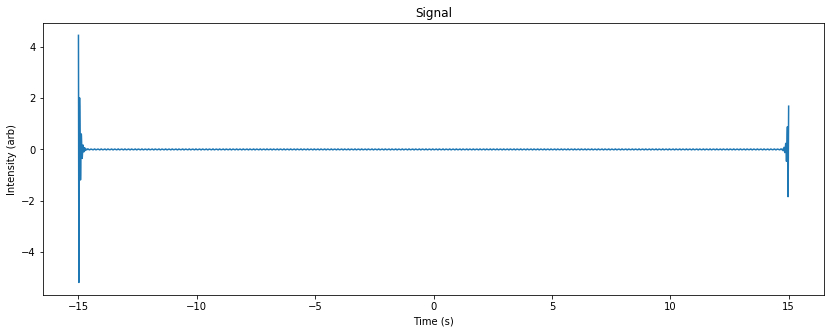

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

ax.plot(t, np.cos(a1*np.pi*t)-25*y3)

ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (arb)')

plt.show()

## Part F

Create a function to filter the Fourier transform. Note that it takes into account positive and negative frequencies.

In [105]:
def bx_window(f, lwr, upr):
    bx = []   
    for fi in f:
        if fi>lwr and fi<upr:
            bx.append(1)
        elif fi>-upr and fi<-lwr:
            bx.append(1)
        else:
            bx.append(0)
    return np.array(bx)

Find the Fourier transform and compute the filtered signal.

In [114]:
X = np.fft.fft(x)
f = np.fft.fftfreq(len(x))/dt

q = bx_window(f, 9, 13)

x_filt = np.real(np.fft.ifft(X*q))

Plot the filtered signal between -1s and 1s:

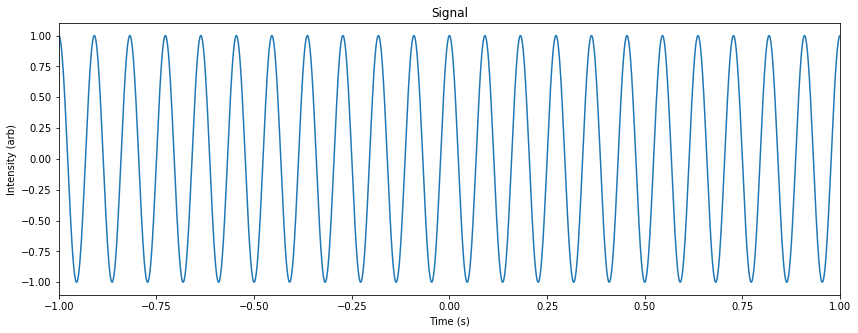

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

ax.plot(t, x_filt)

ax.set_xlim(-1,1)
ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (arb)')

plt.show()

## Part G

Compute the power spectral density.

In [116]:
fq_filt, Gxx_filt = sp.signal.periodogram(x_filt, 1/dt)

Plot the power spectral densities on the same plot:

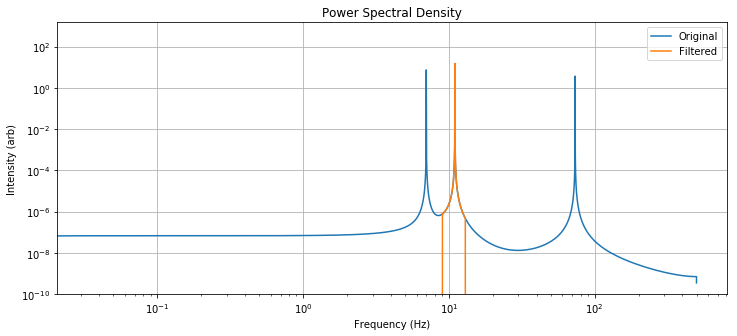

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

#ax.axvline(11, color='r', label='11 Hz', linestyle='dotted')
ax.loglog(fq, Gxx, label='Original')
ax.loglog(fq_filt, Gxx_filt, label='Filtered')
ax.set_ylim(ymin=10**-10)

ax.set_title('Power Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Intensity (arb)')

ax.legend()
ax.grid()

plt.show()

Plot of $x_f-x_1$:

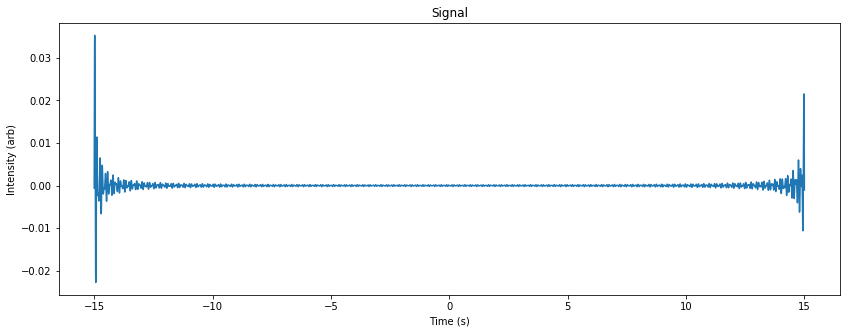

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

ax.plot(t, np.cos(a1*np.pi*t)-x_filt)

ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (arb)')

plt.show()

We get a similar pattern at the beginning and end of this plot to part e), except that it appears to strech on for longer. The advantage of using the boxcar window in this problem was avoiding the use of signal amplification.